### **Bibliotecas para cálculo e montagem dos gráficos**

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def propriedades_no_estadio_i(h, bf, bw, hf, asTrac, alfa, d):
    area = (bf - bw)*hf + bw*h + asTrac*(alfa - 1)
    linhaNeutra = ((bf - bw)*((hf**2)/2) + bw*((h**2)/2) + asTrac*(alfa - 1)*d)/area
    inercia = ((bf - bw)*hf**3)/12 + (bw*h**3)/12 + (bf - bw)*hf*(linhaNeutra - hf/2)**2 + bw*h*(linhaNeutra - h/2)**2 + asTrac*(alfa - 1)*(linhaNeutra - d)**2
    return area, linhaNeutra, inercia

def propriedades_no_estadio_ii(h, bf, bw, hf, asTrac, asComp, alfa, d, dlinha):
#    print(h, bf, bw, hf, asTrac, asComp, alfa, d, dlinha)
    if bf <= bw:
        a1 = bw/2
        a2 = hf*(bf - bw) + (alfa - 1)*asComp + alfa*asTrac
        a3 = -dlinha*(alfa - 1)*asComp - d*alfa*asTrac - (hf**2)/2*(bf - bw)
        linhaNeutra = (-a2 + np.sqrt(a2**2 - 4*a1*a3))/(2*a1)
#        print("if 1 a1 = ", a1)
#        print("if 1 a2 = ", a2)
#        print("if 1 a3 = ", a3)
#        print("if 1 x  = ", linhaNeutra)
    elif bf > bw:
        a1 = bf/2
        a2 = hf*(0) + (alfa - 1)*asComp + alfa*asTrac
        a3 = -dlinha*(alfa - 1)*asComp - d*alfa*asTrac - (hf**2)/2*(0)
        linhaNeutra = (-a2 + (a2**2 - 4*a1*a3)**0.50)/(2*a1)
#        print("if 2 a1 = ", a1)
#        print("if 2 a2 = ", a2)
#        print("if 2 a3 = ", a3)
#        print("if 2 x  = ", linhaNeutra)
        if linhaNeutra > hf:
            a1 = bw/2
            a2 = hf*(bf - bw) + (alfa - 1)*asComp + alfa*asTrac
            a3 = -dlinha*(alfa - 1)*asComp - d*alfa*asTrac - (hf**2)/2*(bf - bw)
            linhaNeutra = (-a2 + np.sqrt(a2**2 - 4*a1*a3))/(2*a1)    
#            print("if 3 a1 = ", a1)
#            print("if 3 a2 = ", a2)
#            print("if 3 a3 = ", a3)
#            print("if 3 x  = ", linhaNeutra)
#    print(linhaNeutra)
    if linhaNeutra <= hf:
        inercia = (bf*linhaNeutra**3)/3 + alfa*asTrac*(linhaNeutra - d)**2 + (alfa - 1)*asComp*(linhaNeutra - dlinha)**2
#        print(inercia)
    else:
        inercia = ((bf - bw)*hf**3)/12 + (bw*linhaNeutra**3)/3 + (bf - bw)*(linhaNeutra - hf/2)**2 + alfa*asTrac*(linhaNeutra - d)**2 + (alfa - 1)*asComp*(linhaNeutra - dlinha)**2
#        print(inercia)
    return linhaNeutra, inercia

In [2]:
# Dados de entrada
fck = 30
Eci = 3100  # Valores retirados da Tabela 8.1 da NBR 6118 (ABNT, 2014)
Ecs = 3100  # Valores retirados da Tabela 8.1 da NBR 6118 (ABNT, 2014)
Es = 20000
alpha = 1.5
h = 50
bw = 25
bf = bw
hf = 0
cob = 2.5
fiEstribo = 5
fiLongTrac = 12.5
fiLongComp = 5
AsTrac = 2*1.25
AsComp = 2*0.20
fy = 500
# Determinação do fctm do concreto (MPa)
fctm = 0.30*fck**(2/3)
fctinf = 0.70*fctm
# Determinação da relação entre módulos de elasticidade
alfaE = Es/Eci
# Determinação das alturas úteis 
d = h - (cob + fiEstribo/10 + fiLongTrac/2/10)
dlinha = cob + fiEstribo/10 + fiLongComp/2/10 

# Listas vazias para armazenamento e armazenamento dos valores iniciais
curv = []
momt = []
curv.append(0)
momt.append(0)

**Passo 1: Determinação do limite entre o Estádio I e Estádio II**

In [3]:
# Determinação das propriedades no Estádio I conforme chamada de biblioteca
Ac, xi, Ii = propriedades_no_estadio_i(h, bf, bw, hf, AsTrac, alfaE, d)
# Determinação do momento resistente
Mr = (alpha*(fctinf/10)*Ii)/(h-xi)
M1 = Mr
# Determinação da deformação e da curvatura
epsilonC = (fctinf/10)/Eci
curvatura1 = epsilonC/xi
# Impressões
print('Área da seção (Ac)      = ', Ac, 'cm^2')
print('Linha Neutra (x)        = ', xi, 'cm')
print('Inércia Estádio I (Ii)  = ', Ii, 'cm^4')
print('Momento Resistente (Mr) = ', Mr, 'kN.cm')
print('EpsilonC                = ', epsilonC*100, '%')
print('Momento 1               = ', M1, 'kN.cm')
print('Curvatura 1             = ', curvatura1, 'cm^-1')
# Armazenamento nas listas
curv.append(curvatura1)
momt.append(M1)

Área da seção (Ac)      =  1263.6290322580646 cm^2
Linha Neutra (x)        =  25.230542791499136 cm
Inércia Estádio I (Ii)  =  266576.4818770343 cm^4
Momento Resistente (Mr) =  3273.131090457643 kN.cm
EpsilonC                =  0.006540411960231684 %
Momento 1               =  3273.131090457643 kN.cm
Curvatura 1             =  2.592259712476471e-06 cm^-1


**Passo 2: Determinação da nova linha neutra para seção fissurada**

In [4]:
# Proriedades da seção no Estádio II
xii, Iii = propriedades_no_estadio_ii(h, bf, bw, hf, AsTrac, AsComp, alfaE, d, dlinha)
# Determinação do par momento-curvatura
M2 = Mr
curvatura2 = M2/(Eci*Iii)
# Impressões
print('Linha Neutra Estádio II  = ', xii, 'cm')
print('Inércia Estádio II (Ii)  = ', Iii, 'cm^4')
print('Momento 2                = ', M2, 'kN.cm')
print('Curvatura 2              = ', curvatura2, 'cm^-1')
# Armazenamento nas listas
curv.append(curvatura2)
momt.append(M2)

Linha Neutra Estádio II  =  7.074152999765129 cm
Inércia Estádio II (Ii)  =  27894.229317812104 cm^4
Momento 2                =  3273.131090457643 kN.cm
Curvatura 2              =  3.7851869891349993e-05 cm^-1


**Passo 3: Aumento da curvatura e mudança no módulo de elasticidade do concreto**

In [5]:
# Determinação da deformação no concreto para o caso estabelecido
epsilonC = (0.45*fck/10)/Ecs
# Determinação da curvatura
curvatura3 = epsilonC/xii
# Determinação do momennto
M3 = Mr*(curvatura3/curvatura2)
# Impressões
print('Momento 3            = ', M3, 'kN.cm')
print('Curvatura 3          = ', curvatura3, 'cm^-1')
# Armazenamento nas listas
curv.append(curvatura3)
momt.append(M3)

Momento 3            =  5323.211072802158 kN.cm
Curvatura 3          =  6.155986037935574e-05 cm^-1


**Passo 4: O escoamento da armadura**

In [6]:
# Estabelecendo as incógnitas do problema para biblioteca sympy
xEpsilonY = sp.Symbol('xEpsilonY')
# Tensão no concreto para um escoamento na armadura (epsilon y = 0,207%)
solucao = sp.solve(AsTrac * fy / 0.10e2 - 0.1656000000e-2 * bw * xEpsilonY**2 / (d - xEpsilonY) * Ecs)
xEpsilonY = solucao[1]
# Determinação da deformação no concreto e a curvatura
epsilonC = (2.07/1000)*(xEpsilonY/(d - xii))
curvatura4 = epsilonC/xEpsilonY
# Determinação do momento para a curvatura 4
M4 = AsTrac*(fy/10)*(d - 0.40*xEpsilonY)
# Impressões
print('Vetor solução       = ', solucao)
print('Linha Neutra        = ', xEpsilonY, 'cm')
print('EpsilonC            = ', epsilonC*100, '%')
print('Momento 4           = ', M4, 'kN.cm')
print('Curvatura 4         = ', curvatura4, 'cm^-1')
# Armazenamento nas listas
curv.append(curvatura4)
momt.append(M4)

Vetor solução       =  [-7.22533059796201, 6.25135522005957]
Linha Neutra        =  6.25135522005957 cm
EpsilonC            =  0.0329262758775809 %
Momento 4           =  5484.30723899702 kN.cm
Curvatura 4         =  5.26706205590844e-5 cm^-1


**Passo 5: Considerando que o concreto atinge o valor de $f_{ck}$ e plastifica completamente a seção comprimida**

In [7]:
# Estabelecendo as incógnitas do problema para biblioteca sympy
xEpsilonCu = sp.Symbol('xEpsilonCu')
# Tensão no concreto para um escoamento na armadura (epsilon y = 0,207%)
solucao = sp.solve(AsTrac * fy / 0.10e2 - 0.8000000000e-1 * bw * xEpsilonCu * fck)
xEpsilonCu = solucao[0]
# Determinação da deformação no concreto e a curvatura
epsilonC = (3.5/1000)
curvatura5 = epsilonC/xEpsilonCu
# Determinação do momento para a curvatura 4
M5 = AsTrac*(fy/10)*(d- 0.40*xEpsilonCu)
# Impressões
print('Vetor solução       = ', solucao)
print('Linha Neutra        = ', xEpsilonCu, 'cm')
print('EpsilonC            = ', epsilonC*100, '%')
print('Momento 4           = ', M5, 'kN.cm')
print('Curvatura 4         = ', curvatura5, 'cm^-1')
# Armazenamento nas listas
curv.append(curvatura5)
momt.append(M5)

Vetor solução       =  [2.08333333333333]
Linha Neutra        =  2.08333333333333 cm
EpsilonC            =  0.35000000000000003 %
Momento 4           =  5692.70833333333 kN.cm
Curvatura 4         =  0.00168000000000000 cm^-1


**Passo 6: Plotagem do diagrama Momento-Curvatura**

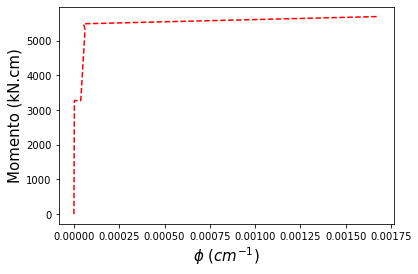

In [8]:
plt.plot(curv, momt,'r--')
plt.ylabel('Momento (kN.cm)', fontsize=15)
plt.xlabel('$\phi$ ($cm^{-1}$)', fontsize=15)
plt.show()